### ----------------------------------------------------------------------------------------------------------
## 社会変革型 医療データサイエンティスト育成講座
# Chapter 3: 線形単回帰モデル
### ----------------------------------------------------------------------------------------------------------

In [8]:
# データのロード
import pandas as pd

# ホームディレクトリにデータを格納していれば、フォルダの指定は必要ありません
bace_data = pd.read_csv('~/DK-SRP/bace_data.csv')
bace_data.head()

,Unnamed: 0,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,ChiralCenterCount,ChiralCenterCountAllPossible,RingCount,...,PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),pIC50,class
0,0,431.56979,4.4014,3.0,2.0,5.0,32.0,2.0,2.0,4.0,...,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,9.154901,1.0
1,1,657.81073,2.6412,5.0,4.0,16.0,47.0,6.0,6.0,4.0,...,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,8.853872,1.0
2,2,591.74091,2.5499,4.0,3.0,11.0,42.0,2.0,3.0,5.0,...,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,8.698970,1.0
3,3,591.67828,3.1680,4.0,3.0,12.0,40.0,4.0,5.0,3.0,...,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,8.698970,1.0
4,4,629.71283,3.5086,3.0,3.0,11.0,44.0,2.0,3.0,5.0,...,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,8.698970,1.0


In [9]:
# データ数の確認
print("N=%s"% len(bace_data))

N=1522


In [10]:
# 説明変数として分子量 (MW), 目的変数としてpIC50を使用します
import numpy as np
X = np.array(bace_data[['MW']])
y = np.array(bace_data['pIC50'])

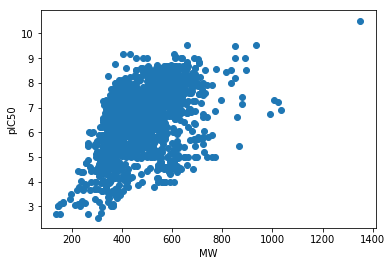

In [11]:
# （参考）データの可視化
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)
plt.xlabel('MW')
plt.ylabel('pIC50')
plt.show()

In [12]:
# sklearn.linear_modelによる線形回帰モデル構築
from sklearn.linear_model import LinearRegression

# インスタンスの作成
linModel = LinearRegression()
linModel.fit(X,y)

# 結果の出力
print(linModel.intercept_, linModel.coef_)

4.191585574838344 [0.00486013]


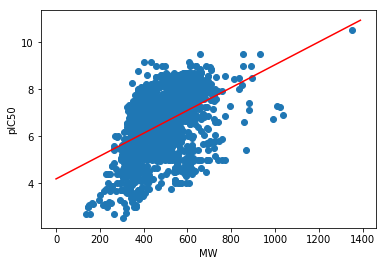

In [13]:
# （参考）回帰の結果の可視化
xx = np.arange(0,1400,10)
yy = linModel.intercept_ + xx*linModel.coef_
plt.scatter(X,y)
plt.plot(xx,yy,'r')
plt.xlabel('MW')
plt.ylabel('pIC50')
plt.show()

In [7]:
# (参考) statsmodelsによる線形回帰モデル構築
import statsmodels.api as sm

# "add_constant"を行う必要があります
X_c = sm.add_constant(X)

# OLSはordinary least squareのことです
mod = sm.OLS(y, X_c)
res = mod.fit()

# summary機能があるのでとても便利！
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     368.8
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           9.25e-74
Time:                        12:37:41   Log-Likelihood:                -2444.6
No. Observations:                1522   AIC:                             4893.
Df Residuals:                    1520   BIC:                             4904.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1916      0.125     33.430      0.0